# **Data Streaming Application (CN7030) CRWK 21-22 [30 marks]**
# **Group ID: 23**
1.   Student 1: Siddharth Dholu - u2165171
2.   Student 2: Param Jogidas - u2187104

---
#####Module leader: **Dr Amin Karami** (a.karami@uel.ac.uk)


If you want to add comments on your group work, please write it here for us:

# **Initiate and Configure Spark Streaming [5 marks]**

---


In [ ]:
# To install findspark, we need to run below command
!pip3 install findspark


# **Task - Data Streaming using PySpark [25 marks]**

---


In [ ]:
# Place your notes/configuration/explanation/codes here:



In [ ]:
# To import findspark package & To initiate it
import findspark
findspark.init()

In [ ]:
# Import required libraries or packages

#Importing SparkContext & StreamingContext to create instance of it
from pyspark import SparkContext
from pyspark.streaming import StreamingContext

# Importing time package to get time
import time

# Creating variable of list that has line index and its words count
countList = []

In [ ]:
# Creating sc instance of SparkContext 
sc = SparkContext(master="local[*]", appName="Group-23")

In [ ]:
# Creating ssc instance of StreamingContext with time interval of 10 seconds
ssc = StreamingContext(sc, 10)

# Creating checkpoint to pretend from system failure like disconnection
ssc.checkpoint("checkpoint")

In [ ]:
# Listening local machine's live data from 7000 port and assigning into liveData variable
liveData = ssc.socketTextStream("localhost", 7000)
# open cmd and type: nc -lk 7000

### Task 1

In [ ]:
# To count the words of only odd number of lines that has word length of 5 or more
# Required perameter: data <RDD>
def countWords(data):
    
    # To print current time
    print(f'============= {time.ctime()} =============')
    
    # To count the number of total RDDs
    if data.count() > 0:
        
        # To take RDD data into list
        dataList = data.collect()
        countList = []
        
        print('---------------------- Input ----------------------')
        for line in dataList:
            print(line)
        
        # Finding the odd number index line
        for index, line in enumerate(list(dataList), start=1):
            wordCount = 0
            if index%2 != 0:
                lineWords = line.split(" ")
                
                # Counting the length of each word in odd index line
                for word in list(lineWords):
                    if len(word) >= 5:
                        wordCount = wordCount + 1
                # Creating final result list for output
                #if wordCount > 0:
                countList.append(f'Line No.({index}) : {wordCount}')
    
    if len(countList) > 0:
        print("\n")
        print('---------------------- Output ----------------------')
        print('Counting the words of odd index lines which has minimum length of 5:')
        
        # Printing each element of final list that contains odd line indexes and word counts
        for item in countList:
            print(f'  {item}')
        print("\n")
        print('Counting the total digits from given data')
        
        # Calling the method of digit count
        countDigits(data)

### Task 2

In [ ]:
# To count the digits from given data
# Required perameter: data <RDD>
def countDigits(data):
    
    # To count the number of total RDDs
    if data.count() > 0:
        digitsCount = 0
        
        # To take RDD data into list
        dataList = data.collect()
        
        # Counting digits from each line with help of built-in method isdigit()
        for line in dataList:
            digitsCount = digitsCount + sum(chr.isdigit() for chr in line)
        print(f'  Total {digitsCount} digits in the data')
        print("\n")

In [ ]:
# Plotting the bar graph of word count of odd lines that have word length 5 or more
# Required perameter: data <list>
def plotData(data):

    if len(data) > 0:

        # To import library for plotting the chart
        import matplotlib.pyplot as plt

        # Creating dictionary to split lines and its word counts
        mapLineWord = {}
        for line in data:
            l = line.split(":")
            mapLineWord[l[0].rstrip()[9:-1]] = int(l[1].strip())

        # Saperating lines and word counts to labels and values
        labels = list(mapLineWord.keys())
        values = list(mapLineWord.values())
        
        # Plotting the chart
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        ax.bar(labels,values)
        plt.title("Odd Line Word Counts")
        plt.xlabel("Lines")
        plt.ylabel("Words >= 5")
        plt.show()

In [ ]:
# Converting streaming data into single RDD with help of flatMap() method
liveData = liveData.flatMap(lambda line: line.split("\n"))

# Executing actions (logics)
liveData.foreachRDD(countWords)

In [ ]:
# To start the spark context for listining or for live data inputs from command terminal
ssc.start()

============= Sat May  7 18:11:00 2022 =============
============= Sat May  7 18:11:10 2022 =============
---------------------- Input ----------------------
0ur gr0up numb3r 1s 23 f0r (N7030
Student 1. S1dd#@rth Dh01u
Student 2. P@ram J0gidas
And th1s 0ur Data Streaming C0ursew0rk
Thank you!


---------------------- Output ----------------------
Counting the words of odd index lines which has minimum length of 5:
  Line No.(1) : 3
  Line No.(3) : 3
  Line No.(5) : 1


Counting the total digits from given data
  Total 21 digits in the data




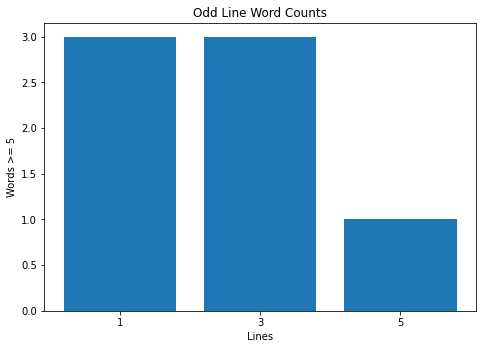

In [ ]:
# To close or terminate streaming context listening from live environment
ssc.stop(stopSparkContext=True, stopGraceFully=True)

# Calling function to plot the data
plotData(countList)

# **Convert ipynb to HTML for Turnitin submission**

---



In [ ]:
!jupyter nbconvert --to html Group23_Streaming_CN7030.ipynb

[NbConvertApp] Converting notebook Group23_Streaming_CN7030.ipynb to html
[NbConvertApp] Writing 304193 bytes to Group23_Streaming_CN7030.html
